A continuación desarrollaremos un integrador simple que utilize el Método de Euler. Para esto, dada una función diferenciable $f(x)$, consideramos una aproximación de la derivada como $$f'(x)\approx \frac{f(x+h)-f(x)}{h}$$. Esta aproximación es válida para $h´s$ lo suficientemente pequeñas. Entonces, dada una condición inicial $f_0=f(x_0)$ se tiene que $f(x0+h)\approx f_0+hf'(x0)$ y al aplicarlo iteradamente con $f(x+h)\approx f(x)+hf'(x)$ se pueden encontrar de manera aproximada los valores de $f(x)$ en un intervalo $[x_0,x_f]$. Si se desean hacer $n$ pasos, entonces $h=\frac{x_f-x_0}{h}$.

In [4]:
import numpy as np

In [5]:
tiempos=np.arange(0.,3.,0.5)
x=tiempos
print tiempos,x

[ 0.   0.5  1.   1.5  2.   2.5] [ 0.   0.5  1.   1.5  2.   2.5]


In [6]:
range(0,5)

[0, 1, 2, 3, 4]

In [7]:
for i in range(1,5):
    print "hi"

hi
hi
hi
hi


In [8]:
np.zeros(5)

array([ 0.,  0.,  0.,  0.,  0.])

In [9]:
def euler (funcion,x0,t0,tf,h=0.01):
    tiempos=np.arange(t0,tf,h)
    x=np.zeros(len(tiempos))
    x[0]=x0
    for i in range(0,len(tiempos)-1):
        x[i+1]=x[i]+h*funcion(x[i],tiempos[i])
    solucion=[tiempos,x]    
    return solucion

Probaremos el integrador con la ecuación diferencial $f´(x=f(t),t)=f(t)=x$ con condiciones iniciales $x_0=x(t=0)=1$. Sabemos que la solución debe ser la función exponencial, por lo que servirá para probar la solución.

In [10]:
def fun(x,t):
    return x

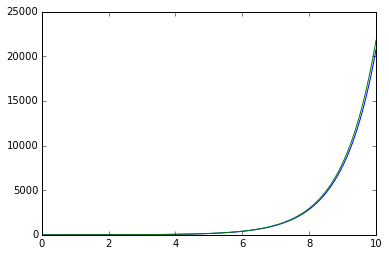

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
sol=euler(fun,1,0,10,0.01)
plt.plot(sol[0],sol[1],sol[0],np.exp(sol[0]))
plt.show()

In [12]:
np.sqrt(1)

1.0

In [13]:
np.sin(2)

0.90929742682568171

In [14]:
def fun2(x,t):
    return 1/(np.sin(t)+1)

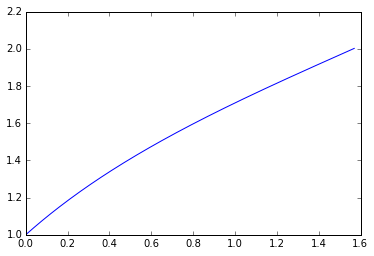

In [15]:
sol=euler(fun2,1,0,np.pi/2,0.01)
#(funcion,x0,t0,tf,h=0.01)
plt.plot(sol[0],sol[1])
plt.show()

Al multiplicar una lista [a,b,...] por un número entero, el arreglo resultante se alarga ese número de veces, replicando las entradas.

In [16]:
3*[1,2] 

[1, 2, 1, 2, 1, 2]

Por otro lado, un array, multiplicado por un número (entero o no) multiplica cada una de las entradas

In [17]:
2.5*np.array([1,2,3])

array([ 2.5,  5. ,  7.5])

Utilizaremos esto para resolver una ecuación diferencial de segundo órden. En este caso se puede reducir a una ecuación de segundo orden. Entonces, se tiene una ecuación diferencial dada por $\ddot{x}=f(x,t)$. Para resolverla hacemos el cambio de variable $v = \dot{x} \Rightarrow \dot{v}=\ddot{x}$. Con esto se tiene un sistema de ecuaciones dado por: 
$\begin{cases} x´=f_1(x,t)\\v´=f_2(x,t) \end{cases}$. En el caso lineal esto es simplemente:

$$ \begin{pmatrix} x' \\ v'  \end{pmatrix}=\begin{matrix}\\\mbox{}\end{matrix}
  \begin{pmatrix} a & b \\ c & d \end{pmatrix} 
  \begin{pmatrix} x \\ v \end{pmatrix}$$
  
  
  Que se puede escribir como $\vec{x}'=A\vec{x}$. Si hacemos Euler mediante $\vec{x_{n+1}}=\vec{x_n}+h A\vec{x_n}$ se obtiene que el método de Euler se puede extender a ecuaciones vectoriales al utilizar arrays en vez de números flotantes. En el siguiente ejemplo resolveremos la ecuación del oscilador harmónico dada por $x''(t)+x=0$

In [18]:
def segundo_orden(x,t):
    return np.array([x[1],-x[0]])

In [38]:
def euler2(funcion,p_ini,tf,h=0.01):
    tiempos = np.arange(p_ini[0],tf,h)
    x = [0]*len(tiempos)
    x[0]=p_ini[1]
    for i in range(0,len(tiempos)-1):
        x[i+1]=x[i]+h*funcion(x[i],tiempos[i])
    solucion = [tiempos,x]    
    return solucion

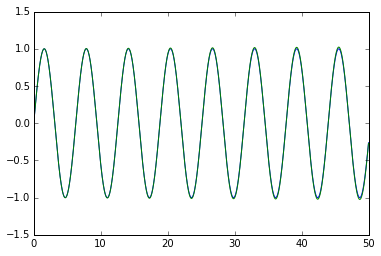

In [66]:
sol=euler2(segundo_orden,[0,np.array([0,1])],50,0.001)
y=np.zeros(len(sol[0]))
v=np.zeros(len(sol[0]))

for i in range(len(sol[1])):
    y[i]=sol[1][i][0]
    v[i]=sol[1][i][1]
    
plt.plot(sol[0],np.sin(sol[0]))
plt.plot(sol[0],y)

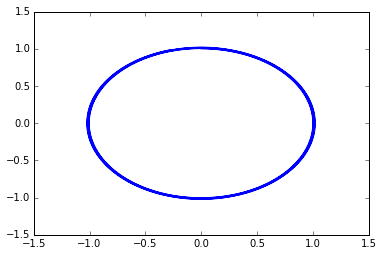

In [65]:
plt.plot(y,v)

In [67]:
def factorial(n):
    fac,num = 1,range(2,n+1)
    for n in num:
        fac = fac*n
    return fac

In [96]:
def mi_sine(x,n_max=10):
    x,y = x%(2*np.pi),0.
    if x <= (np.pi/2):
        #print "intervalo 1"
        x = x
    elif (np.pi/2) < x <= np.pi:
        #print "intervalo 2"
        x = np.pi-x
    elif np.pi < x <= ((3*np.pi)/2):
        #print "intervalo 3"
        x = -(x-np.pi)
    else:
        #print "intervalo 4"
        x = x-2*np.pi
    for n in range(n_max):
        p = 2*n+1
        y += ((-1)**n)*(x**(p)/factorial(p))
        err_max =abs((x**(p+2)/factorial(p+2)))
    return (y,err_max)

In [76]:
print np.sin(np.pi/2)
print mi_sine(np.pi/2)

1.0
intervalo 1
(1.0, 2.571422892860472e-16)


In [83]:
np.zeros(10)

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.])

intervalo 1
intervalo 1
intervalo 1
intervalo 1
intervalo 1
intervalo 1
intervalo 1
intervalo 1
intervalo 1


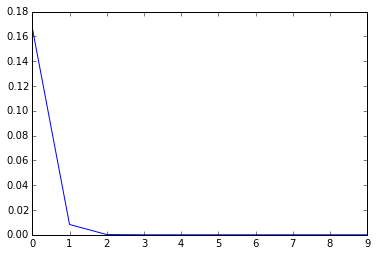

In [93]:
errores=np.zeros(10)
for i in range(1,10):  
    errores[i-1]=mi_sine(1,i)[1]
    
plt.plot(errores)   

In [97]:
%timeit mi_sine(1,5)

100000 loops, best of 3: 9.62 µs per loop
